In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/new_merged_with_predictions_before_scaler.csv')
df.head()

,Contract,InternetService,StreamingMovies,billing_convenience,OnlineSecurity,MonthlyCharges,TotalCharges,Dependents,PaymentMethod,renewed_status,TechSupport,near_contract_end,PaperlessBilling,Partner,tenure,SeniorCitizen,internet_streaming_interaction,Predicted_Leave_Status
0,1,DSL,No,0,No,29.85,29.85,No,Electronic check,0,No,no,Yes,Yes,1,0,0,1
1,12,DSL,No,0,Yes,56.95,1889.50,No,Mailed check,22,No,no,No,No,34,0,0,0
2,12,DSL,No,1,Yes,42.30,1840.75,No,Bank transfer (automatic),33,Yes,no,No,No,45,0,0,0
3,1,Fiber optic,No,1,No,89.10,1949.40,Yes,Credit card (automatic),21,No,no,Yes,No,22,0,0,0
4,1,DSL,No,0,Yes,29.75,301.90,No,Mailed check,9,No,no,No,No,10,0,0,0


In [ ]:
churn_df = df[df['Predicted_Leave_Status'] == 1]
churn_df['Predicted_Leave_Status'].count()

419

In [ ]:
g_labels = ['Have Partner', 'Not Have Partner']
c_labels = ['Have Dependent', 'Not Have Dependents']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=churn_df['Partner'].value_counts(), name="Partner"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=churn_df['Dependents'].value_counts(), name="Dependents"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Partner and Dependents Distributions",
    annotations=[dict(text='Partner', x=0.17, y=0.5, font_size=13, showarrow=False),
                 dict(text='Dependents', x=0.86, y=0.5, font_size=13, showarrow=False)])
fig.show()

In [ ]:
c_labels = ['1 month', '1 year', '2 years']
b_labels = ['Auto','Not Auto']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=c_labels, values=churn_df['Contract'].value_counts(), name="Contract"),
              1, 1)
fig.add_trace(go.Pie(labels=b_labels, values=churn_df['billing_convenience'].value_counts(), name="Billing_Convenience"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Contract and Billing Convenience Distributions",
    annotations=[dict(text='Contract', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Billing', x=0.805, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
fig = px.histogram(churn_df, x="Predicted_Leave_Status", color="PaymentMethod", title="<b>Customer Payment Method distribution</b>")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(churn_df,
                   x="Predicted_Leave_Status",
                   color="InternetService",
                   title="<b>Customer Payment Method distribution</b>",
                   barmode='group',
                   histfunc='count'
                  )

for i, trace in enumerate(fig.data):
    if trace.y is not None:
        total_count = sum(trace.y)
        for j, val in enumerate(trace.y):
            trace.y[j] = (val / total_count)
            fig.data[i].text[j] = f'{trace.y[j]:.2f}'
    else:
        print(f"Warning: trace.y is None for trace {i}. Skipping calculation.")

fig.update_layout(width=600, height=500, bargap=0.1, yaxis_title="Proportion")
fig.show()

<ipython-input-48-4ccb9a2a0223>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, '# of Customers by their tenure')

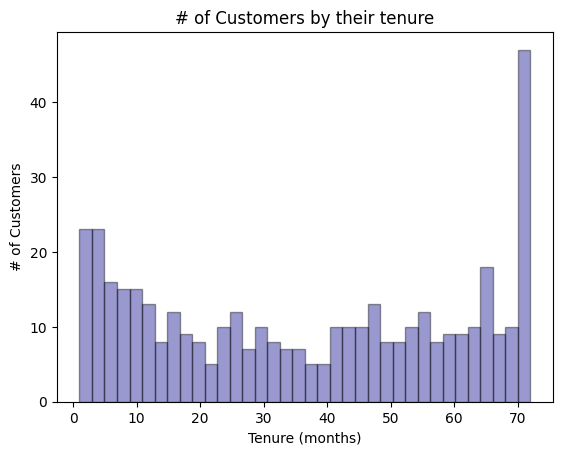

In [ ]:
ax = sns.distplot(churn_df['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

<ipython-input-59-d7aebbdc95df>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, '# of Customers by their Monthly Charges')

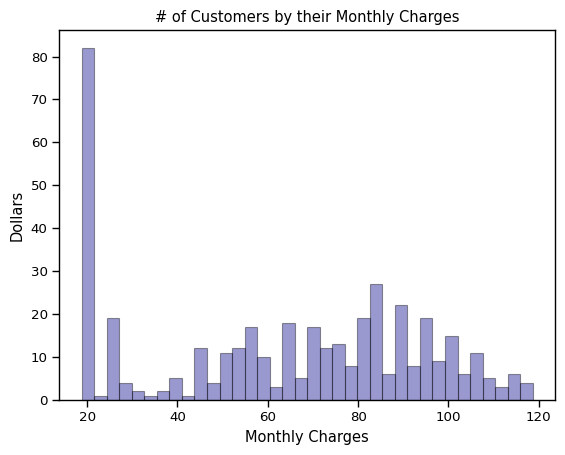

In [ ]:
a1 = sns.distplot(churn_df['MonthlyCharges'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
a1.set_ylabel('Dollars')
a1.set_xlabel('Monthly Charges')
a1.set_title('# of Customers by their Monthly Charges')

<ipython-input-60-c4346383b1a2>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-60-c4346383b1a2>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




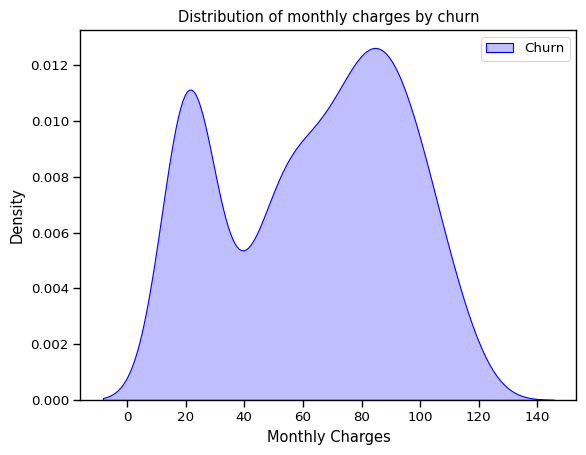

In [ ]:
sns.set_context("paper",font_scale=1.1)
a2 = sns.kdeplot(churn_df.MonthlyCharges[(df["Predicted_Leave_Status"] == 0) ],
                color="Red", shade = True);
a2 = sns.kdeplot(churn_df.MonthlyCharges[(df["Predicted_Leave_Status"] == 1) ],
                color="Blue", shade = True);
a2.legend(["Churn","Not Churn"],loc='upper right');
a2.set_ylabel('Density');
a2.set_xlabel('Monthly Charges');
a2.set_title('Distribution of monthly charges by churn');

<ipython-input-61-045e01ac5684>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-61-045e01ac5684>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




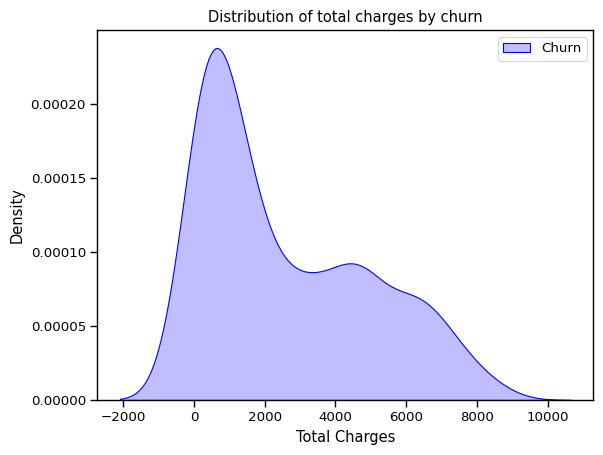

In [ ]:
sns.set_context("paper",font_scale=1.1)
a3 = sns.kdeplot(churn_df.TotalCharges[(df["Predicted_Leave_Status"] == 0) ],
                color="Red", shade = True);
a3 = sns.kdeplot(churn_df.TotalCharges[(df["Predicted_Leave_Status"] == 1) ],
                color="Blue", shade = True);
a3.legend(["Churn","Not Churn"],loc='upper right');
a3.set_ylabel('Density');
a3.set_xlabel('Total Charges');
a3.set_title('Distribution of total charges by churn');

<ipython-input-63-5872fc5bab86>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, '# of Customers by their Total Charges')

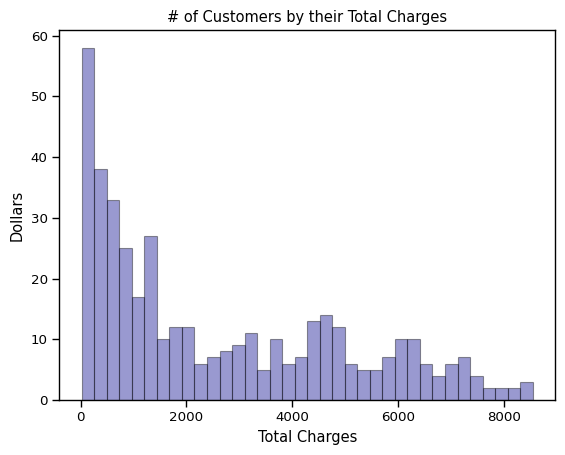

In [ ]:
a1 = sns.distplot(churn_df['TotalCharges'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
a1.set_ylabel('Dollars')
a1.set_xlabel('Total Charges')
a1.set_title('# of Customers by their Total Charges')